In [4]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# 查看系统中所有可用的中文字体
chinese_fonts = [f.name for f in fm.fontManager.ttflist if 'CJK' in f.name or 'Chinese' in f.name or 'SimHei' in f.name or 'Microsoft' in f.name]
print("可用的中文字体：")
for font in set(chinese_fonts):
    print(font)

可用的中文字体：
Microsoft PhagsPa
Microsoft Uighur
Microsoft YaHei
Microsoft JhengHei
Microsoft New Tai Lue
Microsoft Himalaya
Microsoft Sans Serif
Microsoft Yi Baiti
Microsoft Tai Le
SimHei


In [5]:
# 导入必要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 设置中文字体和图形样式
#plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")

print("所有库导入完成！")

所有库导入完成！


# 1.导入必要的库

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 完整的字体设置流程
def setup_chinese_font():
    # 1.直接设置rcParams
    mpl.rcParams['font.family'] = 'sans-serif'
    mpl.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'DejaVu Sans']
    mpl.rcParams['axes.unicode_minus'] = False
    
    # 2.设置seaborn
    sns.set_style("whitegrid")
    sns.set_context("notebook")
    
    # 再次确认字体设置（防止被覆盖）
    plt.rcParams.update({
        'font.family': 'sans-serif',
        'font.sans-serif': ['SimHei', 'Microsoft YaHei', 'DejaVu Sans'],
        'axes.unicode_minus': False
    })

# 调用设置函数
setup_chinese_font()

# 验证
print("最终字体设置:", mpl.rcParams['font.sans-serif'])

最终字体设置: ['SimHei', 'Microsoft YaHei', 'DejaVu Sans']


# 2.加载和探索数据


In [7]:
# 加载IRIS数据集
iris = datasets.load_iris()
X = iris.data  # 特征
y = iris.target  # 目标变量
feature_names = iris.feature_names  # 特征名称
target_names = iris.target_names  # 类别名称

# 创建DataFrame以便更好地查看数据
iris_df = pd.DataFrame(X, columns=feature_names)
iris_df['species'] = [target_names[i] for i in y]

print("数据集基本信息：")
print(f"特征形状: {X.shape}")
print(f"目标变量形状: {y.shape}")
print(f"\n特征名称: {feature_names}")
print(f"类别名称: {target_names}")

print("\n数据前5行：")
print(iris_df.head())

数据集基本信息：
特征形状: (150, 4)
目标变量形状: (150,)

特征名称: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
类别名称: ['setosa' 'versicolor' 'virginica']

数据前5行：
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


# 3.数据可视化

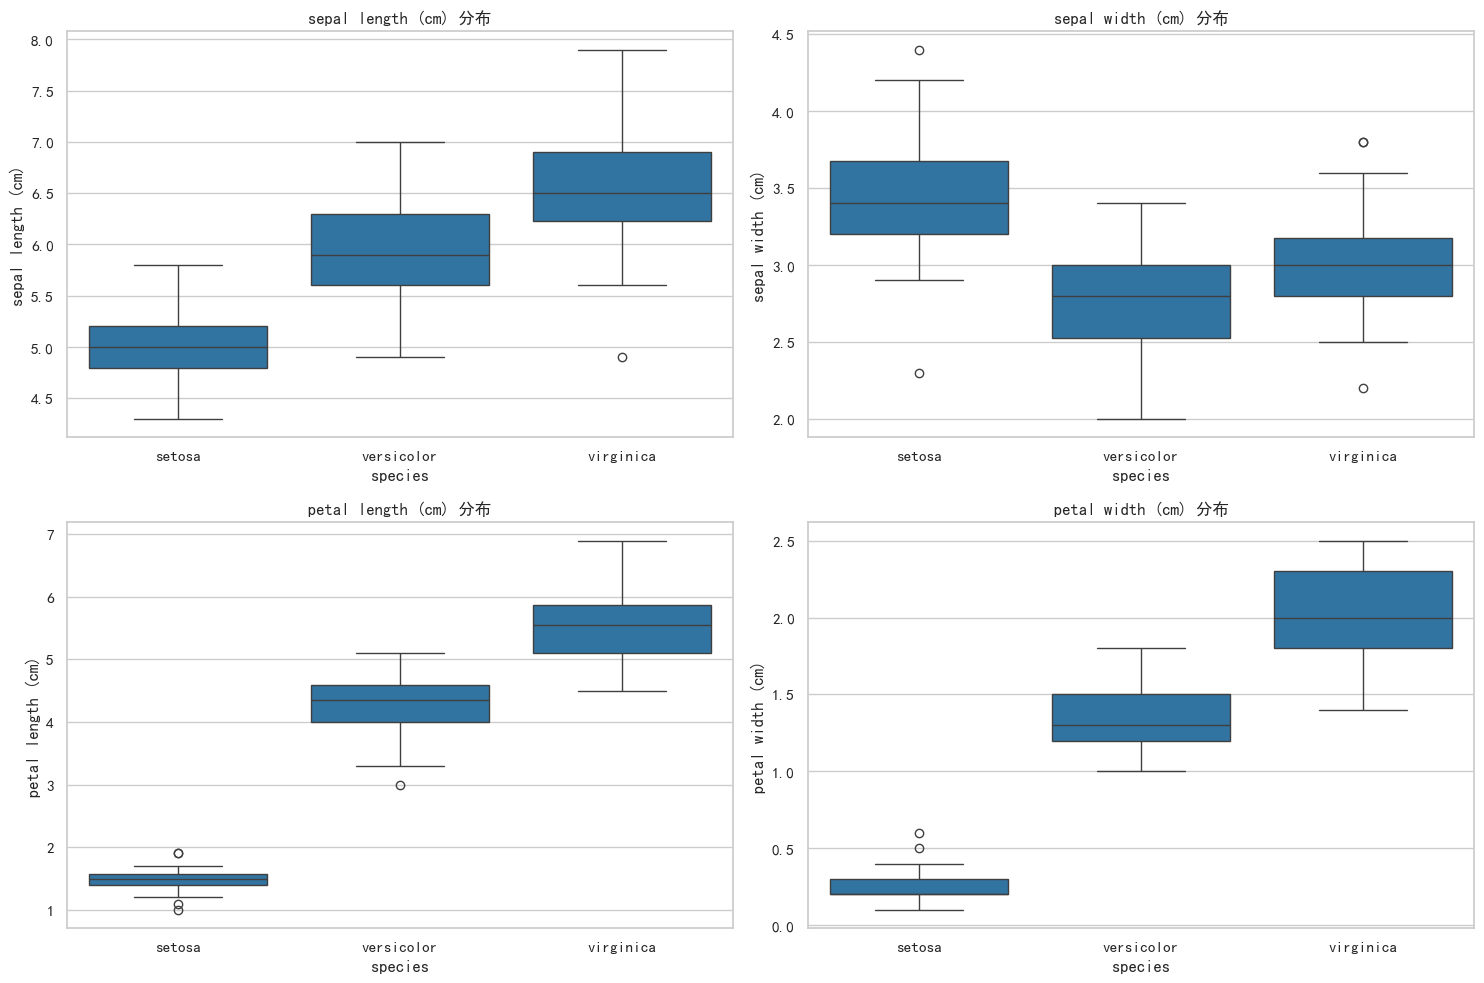

In [8]:
# 数据分布可视化
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 特征分布箱线图
sns.boxplot(data=iris_df, x='species', y=feature_names[0], ax=axes[0,0])
axes[0,0].set_title(f'{feature_names[0]} 分布')

sns.boxplot(data=iris_df, x='species', y=feature_names[1], ax=axes[0,1])
axes[0,1].set_title(f'{feature_names[1]} 分布')

sns.boxplot(data=iris_df, x='species', y=feature_names[2], ax=axes[1,0])
axes[1,0].set_title(f'{feature_names[2]} 分布')

sns.boxplot(data=iris_df, x='species', y=feature_names[3], ax=axes[1,1])
axes[1,1].set_title(f'{feature_names[3]} 分布')

plt.tight_layout()
plt.show()

# 4.特征关系散点图

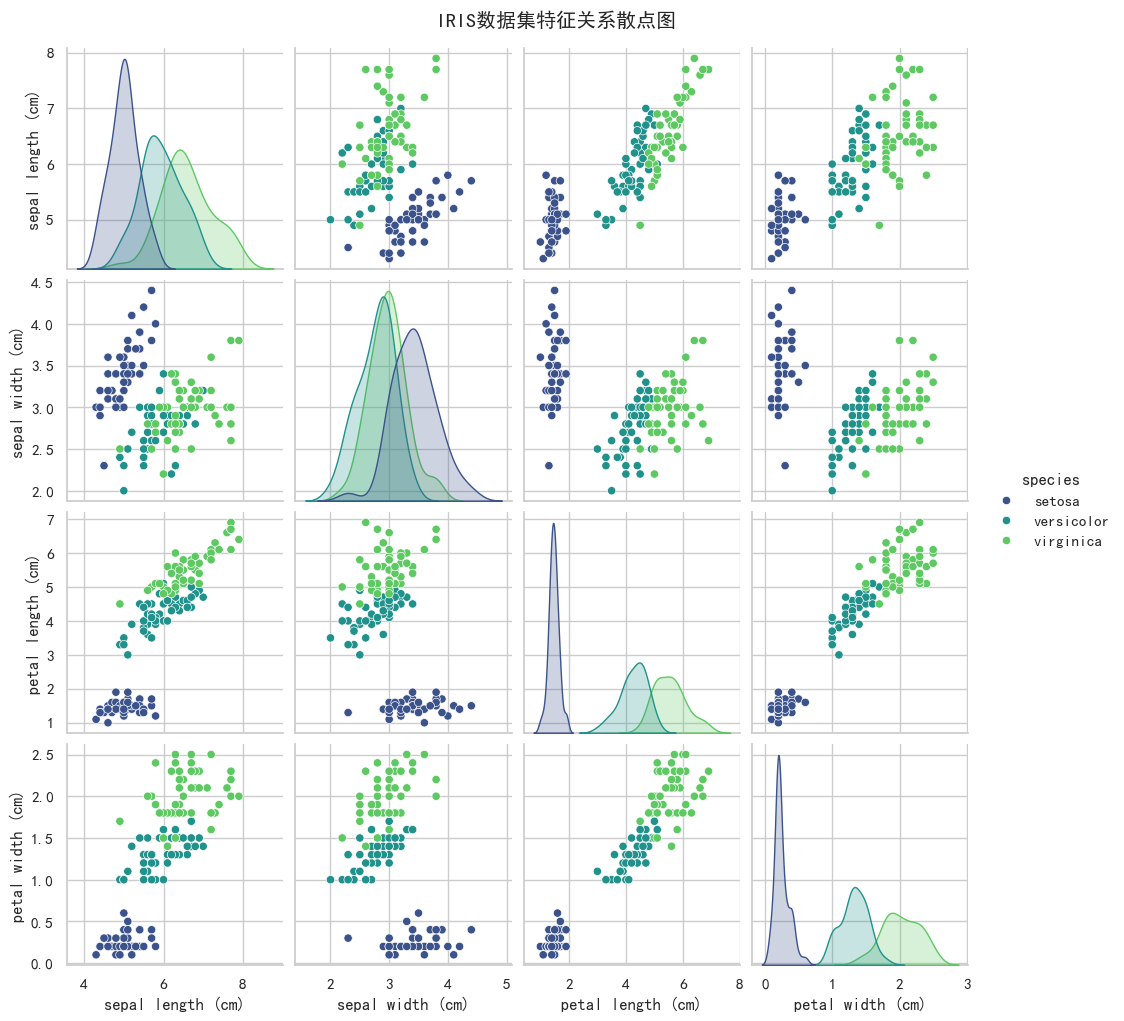

In [9]:
# 散点图矩阵
sns.pairplot(iris_df, hue='species', palette='viridis', height=2.5)
plt.suptitle('IRIS数据集特征关系散点图', y=1.02)
plt.show()

# 5.数据预处理

In [10]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 数据标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"训练集大小: {X_train.shape}")
print(f"测试集大小: {X_test.shape}")
print(f"训练集类别分布: {np.bincount(y_train)}")
print(f"测试集类别分布: {np.bincount(y_test)}")

训练集大小: (105, 4)
测试集大小: (45, 4)
训练集类别分布: [35 35 35]
测试集类别分布: [15 15 15]


# 6.定义和训练SVM模型（三种核函数）

In [11]:
# 定义三种不同核函数的SVM模型
svm_models = {
    'linear': SVC(kernel='linear', C=1.0, random_state=42),
    'rbf': SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42),
    'poly': SVC(kernel='poly', degree=3, C=1.0, gamma='scale', random_state=42)
}

# 训练模型并存储结果
results = {}

for name, model in svm_models.items():
    print(f"训练 {name} 核SVM模型...")
    model.fit(X_train_scaled, y_train)
    
    # 预测
    y_pred = model.predict(X_test_scaled)
    
    # 计算准确率
    accuracy = accuracy_score(y_test, y_pred)
    
    results[name] = {
        'model': model,
        'predictions': y_pred,
        'accuracy': accuracy
    }
    
    print(f"{name}核SVM准确率: {accuracy:.4f}")

训练 linear 核SVM模型...
linear核SVM准确率: 0.9111
训练 rbf 核SVM模型...
rbf核SVM准确率: 0.9333
训练 poly 核SVM模型...
poly核SVM准确率: 0.8667


# 7.模型性能评估

=== 三种核函数性能比较 ===
linear核SVM - 测试集准确率: 0.9111
rbf核SVM - 测试集准确率: 0.9333
poly核SVM - 测试集准确率: 0.8667


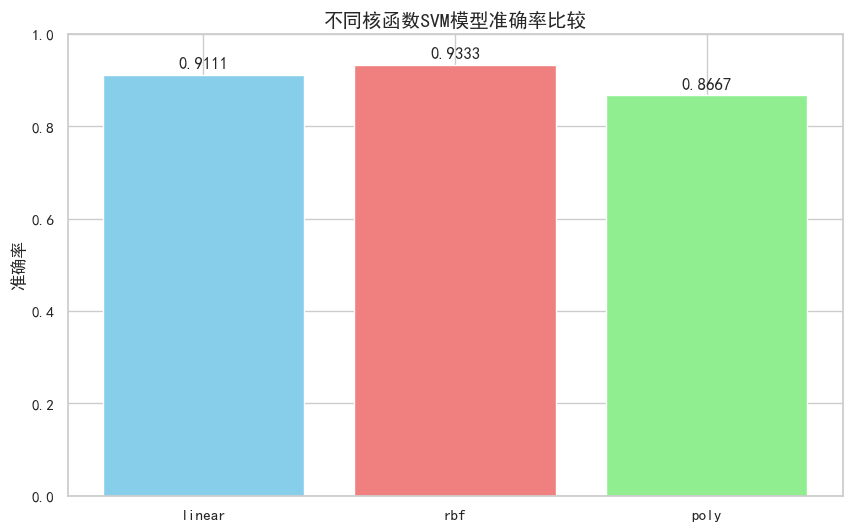

In [12]:
# 比较不同核函数的性能
print("=== 三种核函数性能比较 ===")
for name, result in results.items():
    print(f"{name}核SVM - 测试集准确率: {result['accuracy']:.4f}")

# 可视化准确率比较
accuracies = [result['accuracy'] for result in results.values()]
model_names = list(results.keys())

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('不同核函数SVM模型准确率比较', fontsize=14)
plt.ylabel('准确率', fontsize=12)
plt.ylim(0, 1.0)

# 在柱状图上显示准确率数值
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{accuracy:.4f}', ha='center', va='bottom')

plt.show()

# 8.详细分类报告和混淆矩阵


=== linear核SVM分类报告 ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45


=== rbf核SVM分类报告 ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45


=== poly核SVM分类报告 ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.71      1.00      0.83        15
   virgi

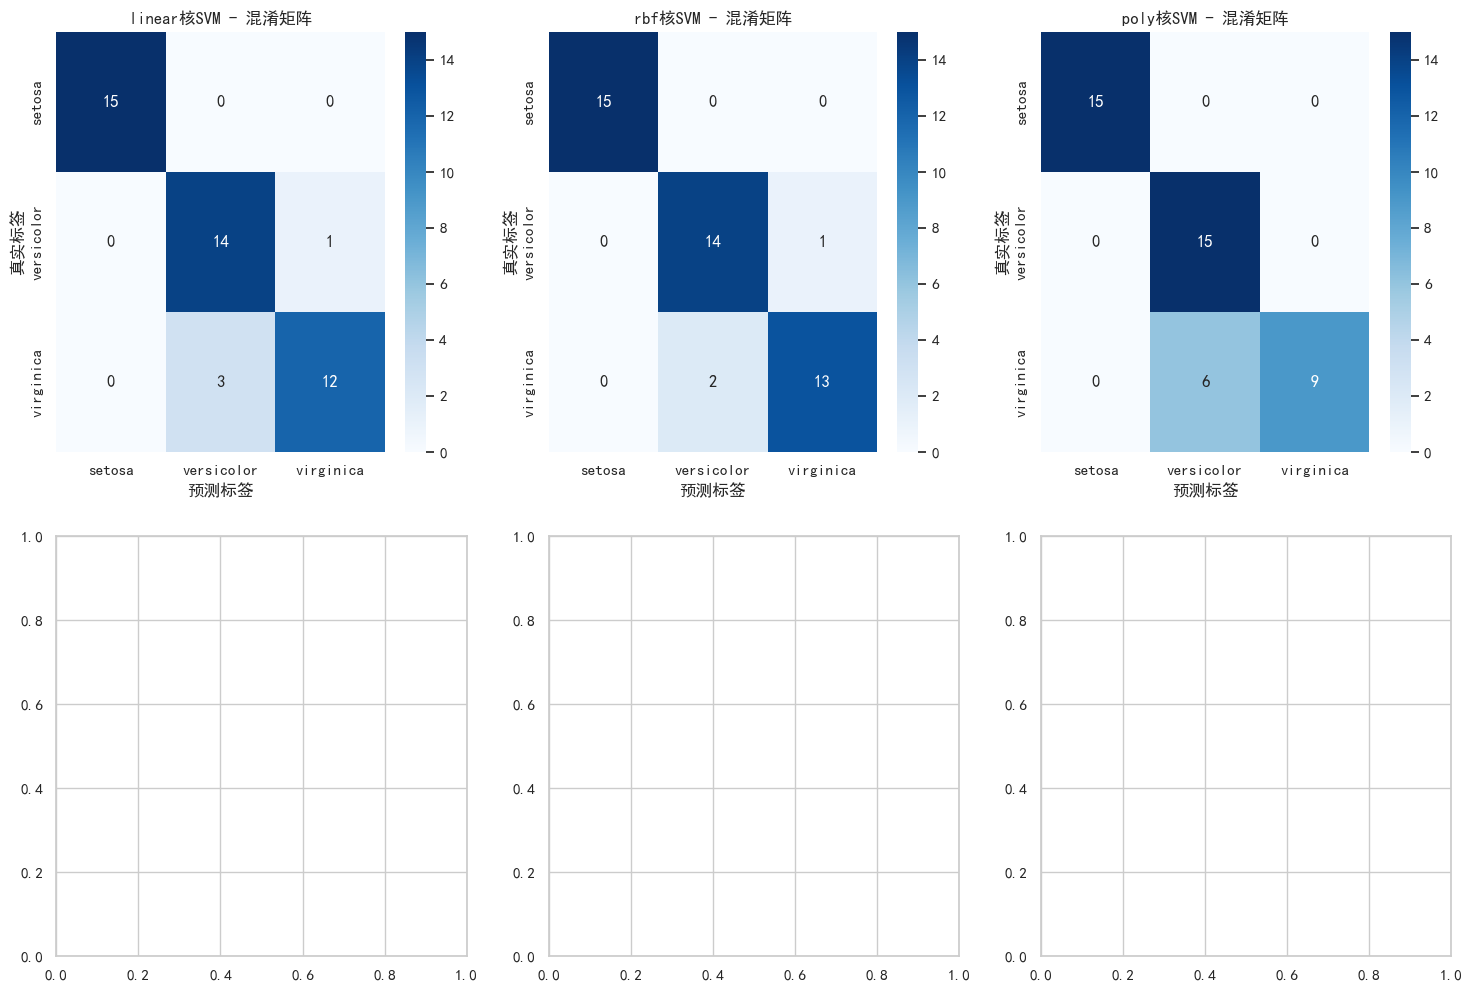

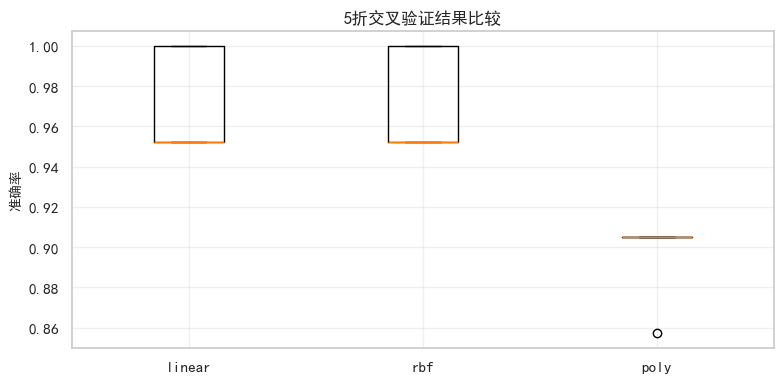

In [15]:
from IPython.display import display, HTML

css = HTML("""
<style>
.output_subarea {
    overflow: auto;
    height: 100vh;
    width: 100vw;
}
</style>
""")
display(css)

# 为每个模型生成详细的分类报告和混淆矩阵
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for i, (name, result) in enumerate(results.items()):
    # 分类报告
    print(f"\n=== {name}核SVM分类报告 ===")
    print(classification_report(y_test, result['predictions'], 
                              target_names=target_names))
    
    # 混淆矩阵
    cm = confusion_matrix(y_test, result['predictions'])
    
    # 绘制混淆矩阵
    row = i // 3
    col = i % 3
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=target_names, yticklabels=target_names,
                ax=axes[0, col])
    axes[0, col].set_title(f'{name}核SVM - 混淆矩阵')
    axes[0, col].set_xlabel('预测标签')
    axes[0, col].set_ylabel('真实标签')

# 交叉验证比较
print("\n=== 交叉验证结果比较 (5折) ===")
cv_results = {}
for name, model in svm_models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    cv_results[name] = cv_scores
    print(f"{name}核SVM - 交叉验证平均准确率: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
"""
# 绘制交叉验证结果
plt.figure(figsize=(12, 6))
box_data = [cv_results['linear'], cv_results['rbf'], cv_results['poly']]
#plt.boxplot(box_data, labels=['linear', 'rbf', 'poly'])
plt.boxplot(box_data, tick_labels=['linear', 'rbf', 'poly'])
plt.title('5折交叉验证结果比较', fontsize=14)
plt.ylabel('准确率', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()
"""

# 绘制交叉验证结果
plt.figure(figsize=(8, 4))  # 减小图形尺寸
box_data = [cv_results['linear'], cv_results['rbf'], cv_results['poly']]
plt.boxplot(box_data, tick_labels=['linear', 'rbf', 'poly'])
plt.title('5折交叉验证结果比较', fontsize=12)  # 减小标题字体
plt.ylabel('准确率', fontsize=10)  # 减小坐标轴标签字体
plt.grid(True, alpha=0.3)
plt.tight_layout()  # 自动调整子图参数，使图形更紧凑
plt.show()

# 9.特征重要性分析（线性核）


In [ ]:
# 对于线性核SVM，可以查看特征重要性
linear_model = results['linear']['model']

if hasattr(linear_model, 'coef_'):
    # 获取特征权重
    feature_importance = np.abs(linear_model.coef_)
    
    # 多分类情况下有多个权重向量，取平均
    if len(feature_importance) > 1:
        feature_importance = np.mean(feature_importance, axis=0)
    else:
        feature_importance = feature_importance[0]
    
    # 创建特征重要性DataFrame
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': feature_importance
    }).sort_values('importance', ascending=False)
    
    print("=== 线性SVM特征重要性 ===")
    print(importance_df)
    
    # 可视化特征重要性
    plt.figure(figsize=(10, 6))
    #sns.barplot(data=importance_df, x='importance', y='feature', palette='viridis')
    sns.barplot(data=importance_df, x='importance', y='feature', hue='feature', palette='viridis', legend=False)
    plt.title('线性SVM特征重要性', fontsize=14)
    plt.xlabel('重要性得分', fontsize=12)
    plt.tight_layout()
    plt.show()

# 10.模型总结和建议

In [ ]:
# 模型性能总结
print("=== 最终模型性能总结 ===")
best_model_name = max(results.items(), key=lambda x: x[1]['accuracy'])[0]
best_accuracy = results[best_model_name]['accuracy']

print(f"最佳模型: {best_model_name}核SVM")
print(f"最佳准确率: {best_accuracy:.4f}")
print(f"测试集样本数: {len(X_test)}")
print(f"错误分类样本数: {len(X_test) - int(best_accuracy * len(X_test))}")

print("\n=== 核函数特点总结 ===")
kernel_info = {
    'linear': '适用于线性可分数据，计算简单，可解释性强',
    'rbf': '适用于非线性数据，需要调整gamma参数',
    'poly': '适用于多项式关系数据，需要调整degree参数'
}

for kernel, info in kernel_info.items():
    accuracy = results[kernel]['accuracy']
    print(f"{kernel}核: {info}")
    print(f"   准确率: {accuracy:.4f}")

print("\n建议：")
if best_model_name == 'linear':
    print("数据可能是线性可分的，线性核表现最佳")
elif best_model_name == 'rbf':
    print("数据可能是非线性的，RBF核表现最佳")
else:
    print("数据可能具有多项式关系")

In [ ]:
# 补充：与其他分类算法对比
print("=== 与其他分类算法对比 ===")

from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.metrics import accuracy_score

# 定义对比模型
compare_models = {
    'Perceptron': Perceptron(random_state=42, max_iter=1000, eta0=1),
    'LogisticRegression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM_linear': SVC(kernel='linear', random_state=42),
    'SVM_rbf': SVC(kernel='rbf', random_state=42)
}

# 训练和评估对比模型
comparison_results = {}

for name, model in compare_models.items():
    print(f"训练 {name}...")
    
    # 训练模型
    model.fit(X_train_scaled, y_train)
    
    # 预测
    y_pred = model.predict(X_test_scaled)
    
    # 计算准确率
    accuracy = accuracy_score(y_test, y_pred)
    
    comparison_results[name] = {
        'model': model,
        'accuracy': accuracy,
        'predictions': y_pred
    }
    
    print(f"{name} 测试集准确率: {accuracy:.4f}")

# 可视化对比结果
plt.figure(figsize=(12, 6))
models = list(comparison_results.keys())
accuracies = [comparison_results[name]['accuracy'] for name in models]
colors = ['lightblue', 'lightgreen', 'lightcoral', 'gold']

bars = plt.bar(models, accuracies, color=colors)
plt.title('不同分类算法性能对比', fontsize=14)
plt.ylabel('准确率', fontsize=12)
plt.ylim(0.7, 1.0)

# 在柱状图上显示数值
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
             f'{accuracy:.4f}', ha='center', va='bottom', fontweight='bold')

plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

In [ ]:
# 补充：样本数量对性能的影响分析
print("=== 样本数量对SVM性能的影响 ===")

from sklearn.model_selection import learning_curve

# 使用表现最好的RBF SVM
best_model = SVC(kernel='rbf', random_state=42)

# 计算学习曲线
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train_scaled, y_train, 
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', random_state=42
)

# 计算均值和标准差
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# 绘制学习曲线 - 图片尺寸变小
plt.figure(figsize=(10, 6))  # 从原来的(12, 8)改为(10, 6)
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='训练集准确率')
plt.plot(train_sizes, test_scores_mean, 'o-', color='red', label='验证集准确率')

# 添加标准差区域
plt.fill_between(train_sizes, 
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, 
                 alpha=0.1, color='blue')
plt.fill_between(train_sizes, 
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, 
                 alpha=0.1, color='red')

plt.title('学习曲线 - RBF SVM', fontsize=14)
plt.xlabel('训练样本数量', fontsize=12)
plt.ylabel('准确率', fontsize=12)
plt.legend(loc='best')
plt.grid(True, alpha=0.3)

# 标记关键点
critical_size = train_sizes[np.argmax(test_scores_mean)]
critical_accuracy = np.max(test_scores_mean)
plt.axvline(x=critical_size, color='green', linestyle='--', alpha=0.7)
plt.text(critical_size, critical_accuracy - 0.1, 
         f'最优: {critical_size:.0f}样本\n准确率: {critical_accuracy:.3f}',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
         fontsize=10)  # 添加字体大小调整

plt.tight_layout()
plt.show()

print(f"分析结论:")
print(f"- 训练样本从{int(train_sizes[0]*105)}增加到{int(train_sizes[-1]*105)}个")
print(f"- 验证集准确率从{test_scores_mean[0]:.3f}提升到{test_scores_mean[-1]:.3f}")
print(f"- 最优训练样本数: {int(critical_size*105)}个")

In [ ]:
# 补充：与其他分类算法对比
print("=== 与其他分类算法对比 ===")

from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.metrics import accuracy_score

# 定义对比模型
compare_models = {
    'Perceptron': Perceptron(random_state=42, max_iter=1000, eta0=1),
    'LogisticRegression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM_linear': SVC(kernel='linear', random_state=42),
    'SVM_rbf': SVC(kernel='rbf', random_state=42)
}

# 训练和评估对比模型
comparison_results = {}

for name, model in compare_models.items():
    print(f"训练 {name}...")
    
    # 训练模型
    model.fit(X_train_scaled, y_train)
    
    # 预测
    y_pred = model.predict(X_test_scaled)
    
    # 计算准确率
    accuracy = accuracy_score(y_test, y_pred)
    
    comparison_results[name] = {
        'model': model,
        'accuracy': accuracy,
        'predictions': y_pred
    }
    
    print(f"{name} 测试集准确率: {accuracy:.4f}")

# 可视化对比结果
plt.figure(figsize=(10, 4))
models = list(comparison_results.keys())
accuracies = [comparison_results[name]['accuracy'] for name in models]
colors = ['lightblue', 'lightgreen', 'lightcoral', 'gold']

bars = plt.bar(models, accuracies, color=colors)
plt.title('不同分类算法性能对比', fontsize=10)
plt.ylabel('准确率', fontsize=8)
plt.ylim(0.7, 1.0)

# 在柱状图上显示数值
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
             f'{accuracy:.4f}', ha='center', va='bottom', fontweight='bold')

plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()